Este proyecto tiene como objetivo clasificar artículos de noticias en diversas categorías utilizando técnicas de Procesamiento de Lenguaje Natural (NLP) y algoritmos de Machine Learning. Las categorías incluyen "Cultura", "Deportes", "Economía", "España", "Internacional" y "Sociedad".

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Primeras filas del DataFrame después del preprocesamiento:
                                              TÍTULO                 FECHA  \
0  La NASA ha pedido a SpaceX que construya una n...  2024-06-26T23:17:12Z   
1  La situación del traje espacial de la ISS de l...  2024-06-26T17:25:00Z   
2  Prefijo +39 en WhatsApp y llamadas: ten cuidad...  2024-06-26T18:36:42Z   
3  Collins Aerospace se retira del contrato para ...  2024-06-26T09:27:58Z   
4  Tanques y militares armados toman la sede del ...  2024-06-26T20:16:50Z   

                            AUTOR  \
0                 Matías S. Zavia   
1                   Passant Rabie   
2                   Marcos Merino   
3  wicho@microsiervos.com (Wicho)   
4                        Agencias   

                                           CONTENIDO      CATEGORÍA  \
0  La NASA ha seleccionado a SpaceX para la noble...  Internacional   
1  Dos astronautas de la NASA se estaban preparan...  Internacional   
2  En los últimos meses, ha habido u

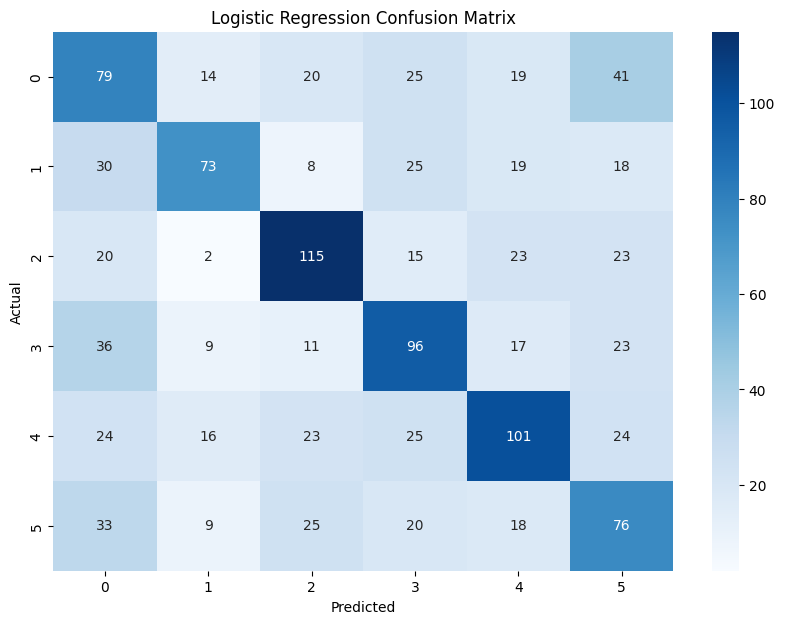

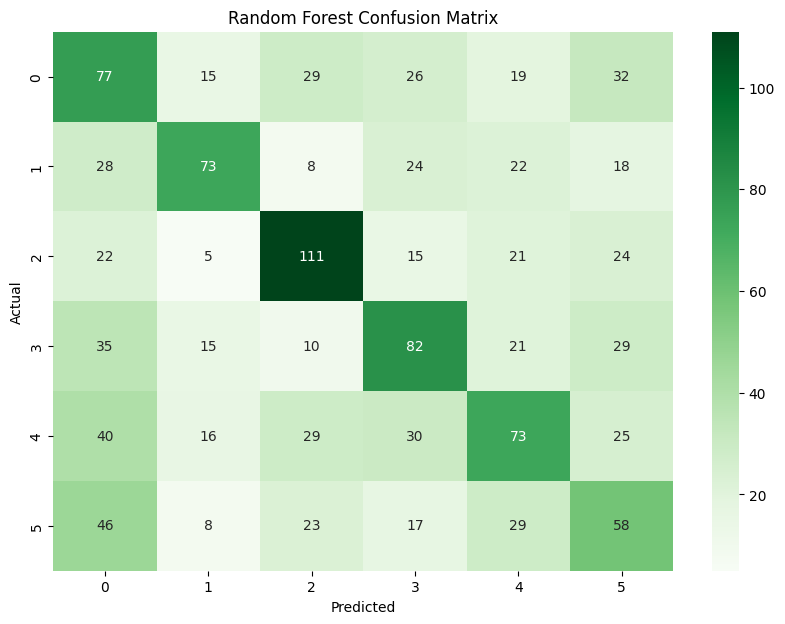

In [ ]:
# Instalar las dependencias necesarias
!pip install nltk seaborn

# Importar las librerías necesarias
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Cargar el dataset
df_news = pd.read_csv('dataset_noticias.csv')

# Definir el preprocesamiento: establecer stopwords y stemmer
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')

def preprocess_text(text):
    if isinstance(text, float):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Aplicar el preprocesamiento al texto
df_news['cleaned_text'] = df_news['CONTENIDO'].astype(str).apply(preprocess_text)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame después del preprocesamiento:")
print(df_news.head())

# Verificar y manejar NaNs (Not a number)
print(df_news.isnull().sum())

# Eliminar filas con NaNs en 'CONTENIDO' y 'CATEGORÍA'
df_news.dropna(subset=['CONTENIDO', 'CATEGORÍA'], inplace=True)

# Rellenar NaNs en autor con "desconocido"
df_news['AUTOR'].fillna('Desconocido', inplace=True)

# Verificar nuevamente los NaNs después del manejo
print("\nConteo de NaNs después del manejo:")
print(df_news.isnull().sum())

# Vectorización del texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_news['cleaned_text'])
y = df_news['CATEGORÍA']

# Imprimir la forma de la matriz para verificar que la vectorización se ha realizado correctamente.
print("Forma de la matriz TF-IDF:", X.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluar los modelos
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Visualización de la matriz de confusión para Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10,7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualización de la matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


